In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Mounting Google drive into the local python notebook to read the data from csv file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file = 'drive/My Drive/Colab Notebooks/Model_Main_2.csv'
df = pd.read_csv(file)

In [0]:
df.head()

,created_am_la,payment_method_name,transaction_currency,transaction_date_am_la,user_id,user_creation_date,plan_period,plan_period_first_activated_plan,transaction_amount_100_usd,payment_method_name_use,error_message,crosswalkplanperiod_touse,plan_country_from_subscription,user_external_plan_first_activated_plan,browser,operatingSystem,isMobile,mobileDeviceBranding,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback
0,5/3/2019 19:51,debitcard,MXN,5/3/2019 17:00,341412195,5/4/2019 2:49,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Motorola,mobile,Americas,Central America,Mexico,Aguascalientes,20190504,7,23,0,0,0,0
1,5/5/2019 9:10,creditcard,ARS,5/4/2019 17:00,341479440,5/5/2019 16:09,30,30,6.73,creditcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Samsung,mobile,Americas,South America,Argentina,(not set),20190505,20,26,0,0,0,0
2,5/5/2019 12:06,debitcard,MXN,5/4/2019 17:00,334039570,1/8/2019 3:57,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Windows,False,0,desktop,Americas,Central America,Mexico,Tepexpan,20190505,13,13,1,0,85,0
3,5/6/2019 16:40,creditcard,ARS,5/5/2019 17:00,341572424,5/6/2019 19:00,30,30,0.65,creditcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Americas,South America,Argentina,(not set),20190519,4,10,0,0,0,0
4,5/10/2019 3:37,debitcard,EUR,5/9/2019 17:00,315339375,3/9/2018 17:55,30,30,2.25,debitcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Europe,Southern Europe,Spain,Pamplona,20190510,10,13,0,0,14,0


In [0]:
print('Chargebacks are   :',sum(df['chargeback']))
print('No Chargebacks are:',sum(df['chargeback']==0))
print('Chargebacks are',(sum(df['chargeback'])/sum(df['chargeback']==0))*100,'% of total transaction')

Chargebacks are   : 225
No Chargebacks are: 11525
Chargebacks are 1.9522776572668112 % of total transaction


In [0]:
df.isnull().sum()

created_am_la                                 0
payment_method_name                           0
transaction_currency                          0
transaction_date_am_la                        0
user_id                                       0
user_creation_date                            0
plan_period                                   0
plan_period_first_activated_plan              0
transaction_amount_100_usd                    0
payment_method_name_use                       0
error_message                                 0
crosswalkplanperiod_touse                  9739
plan_country_from_subscription             7924
user_external_plan_first_activated_plan       0
browser                                       0
operatingSystem                               0
isMobile                                      0
mobileDeviceBranding                          0
deviceCategory                                0
continent                                     0
subContinent                            

In [0]:
df.dtypes

created_am_la                               object
payment_method_name                         object
transaction_currency                        object
transaction_date_am_la                      object
user_id                                      int64
user_creation_date                          object
plan_period                                  int64
plan_period_first_activated_plan             int64
transaction_amount_100_usd                 float64
payment_method_name_use                     object
error_message                               object
crosswalkplanperiod_touse                  float64
plan_country_from_subscription              object
user_external_plan_first_activated_plan     object
browser                                     object
operatingSystem                             object
isMobile                                      bool
mobileDeviceBranding                        object
deviceCategory                              object
continent                      

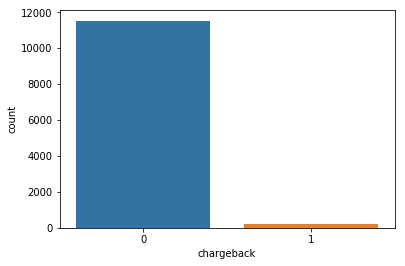

In [0]:
sns.countplot('chargeback',data=df)

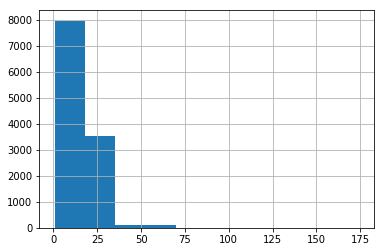

In [0]:
df['transaction_amount_100_usd'].hist()

In [0]:
df.user_creation_date.str.slice(-5,-3).astype(int).head()

0     2
1    16
2     3
3    19
4    17
Name: user_creation_date, dtype: int64

# **Convert date fields to datetime for easy processing**

In [0]:
df['user_creation_date']=pd.to_datetime(df.user_creation_date)

In [0]:
df['created_am_la'] = pd.to_datetime(df.created_am_la)

In [0]:
df['transaction_date_am_la'] = pd.to_datetime(df.transaction_date_am_la)

In [0]:
df['last_login'] = pd.to_datetime(df.last_login,format='%Y%m%d')
df.last_login.head()

0   2019-05-04
1   2019-05-05
2   2019-05-05
3   2019-05-19
4   2019-05-10
Name: last_login, dtype: datetime64[ns]

In [0]:
df.user_creation_date.dt.hour.head()

0     2
1    16
2     3
3    19
4    17
Name: user_creation_date, dtype: int64

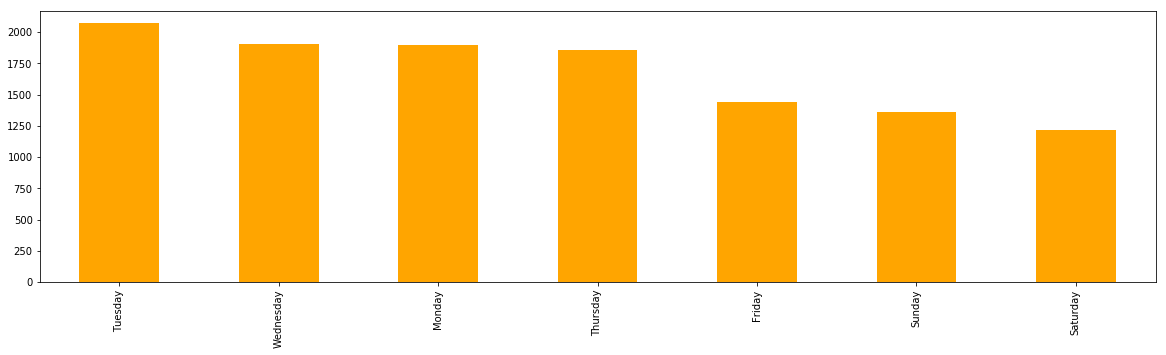

In [0]:
df.user_creation_date.dt.weekday_name.value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(20,5),color='orange')

In [0]:
df.user_creation_date.dt.weekday.head()

0    5
1    6
2    1
3    0
4    4
Name: user_creation_date, dtype: int64

In [0]:
df.user_creation_date.dt.dayofyear.head()

0    124
1    125
2      8
3    126
4     68
Name: user_creation_date, dtype: int64

In [0]:
df.chargeback.value_counts()

0    11525
1      225
Name: chargeback, dtype: int64

# **Change timezone**

In [0]:
# Creating new field from existing filed
df['user_creation_date_am_la']=df.user_creation_date.dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')

In [0]:
df['user_creation_date_am_la'].head(10)

0   2019-05-03 19:49:00-07:00
1   2019-05-05 09:09:00-07:00
2   2019-01-07 19:57:00-08:00
3   2019-05-06 12:00:00-07:00
4   2018-03-09 09:55:00-08:00
5   2019-05-07 19:43:00-07:00
6   2019-03-05 17:45:00-08:00
7   2019-03-27 08:11:00-07:00
8   2019-05-08 15:34:00-07:00
9   2019-05-09 05:24:00-07:00
Name: user_creation_date_am_la, dtype: datetime64[ns, America/Los_Angeles]

In [0]:
# Lets check manually few if conversion went correct
df[['user_creation_date','user_creation_date_am_la']].head()

,user_creation_date,user_creation_date_am_la
0,2019-05-04 02:49:00,2019-05-03 19:49:00-07:00
1,2019-05-05 16:09:00,2019-05-05 09:09:00-07:00
2,2019-01-08 03:57:00,2019-01-07 19:57:00-08:00
3,2019-05-06 19:00:00,2019-05-06 12:00:00-07:00
4,2018-03-09 17:55:00,2018-03-09 09:55:00-08:00


In [0]:
# It seems conversion is correct so lets drop the original field, since it is no more required

df.drop(['user_creation_date'],axis=1,inplace=True)

In [0]:
df.head()

,created_am_la,payment_method_name,transaction_currency,transaction_date_am_la,user_id,plan_period,plan_period_first_activated_plan,transaction_amount_100_usd,payment_method_name_use,error_message,crosswalkplanperiod_touse,plan_country_from_subscription,user_external_plan_first_activated_plan,browser,operatingSystem,isMobile,mobileDeviceBranding,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la
0,2019-05-03 19:51:00,debitcard,MXN,2019-05-03 17:00:00,341412195,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Motorola,mobile,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00
1,2019-05-05 09:10:00,creditcard,ARS,2019-05-04 17:00:00,341479440,30,30,6.73,creditcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Samsung,mobile,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00
2,2019-05-05 12:06:00,debitcard,MXN,2019-05-04 17:00:00,334039570,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Windows,False,0,desktop,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00
3,2019-05-06 16:40:00,creditcard,ARS,2019-05-05 17:00:00,341572424,30,30,0.65,creditcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00
4,2019-05-10 03:37:00,debitcard,EUR,2019-05-09 17:00:00,315339375,30,30,2.25,debitcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00


In [0]:
df.user_creation_date_am_la.head(10)
df.user_creation_date_am_la.isnull().sum()

0

In [0]:
df.dtypes

created_am_la                                                   datetime64[ns]
payment_method_name                                                     object
transaction_currency                                                    object
transaction_date_am_la                                          datetime64[ns]
user_id                                                                  int64
plan_period                                                              int64
plan_period_first_activated_plan                                         int64
transaction_amount_100_usd                                             float64
payment_method_name_use                                                 object
error_message                                                           object
crosswalkplanperiod_touse                                              float64
plan_country_from_subscription                                          object
user_external_plan_first_activated_plan             

**Lets set the timezone of the field 'transaction_date_am_la', otherwise it will fail while doing some datetime operation**

In [0]:
df['transaction_date_am_la_fix'] = df.transaction_date_am_la.dt.tz_localize('America/Los_Angeles')
df[['transaction_date_am_la','transaction_date_am_la_fix','user_creation_date_am_la']].head()

,transaction_date_am_la,transaction_date_am_la_fix,user_creation_date_am_la
0,2019-05-03 17:00:00,2019-05-03 17:00:00-07:00,2019-05-03 19:49:00-07:00
1,2019-05-04 17:00:00,2019-05-04 17:00:00-07:00,2019-05-05 09:09:00-07:00
2,2019-05-04 17:00:00,2019-05-04 17:00:00-07:00,2019-01-07 19:57:00-08:00
3,2019-05-05 17:00:00,2019-05-05 17:00:00-07:00,2019-05-06 12:00:00-07:00
4,2019-05-09 17:00:00,2019-05-09 17:00:00-07:00,2018-03-09 09:55:00-08:00


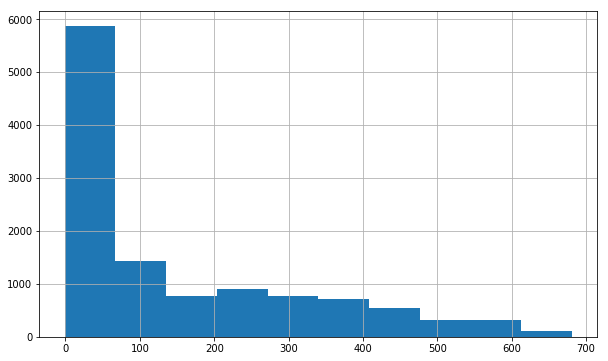

In [0]:
(df.transaction_date_am_la_fix - df.user_creation_date_am_la).dt.days.hist(figsize=(10,6))

In [0]:
df.head()

,created_am_la,payment_method_name,transaction_currency,transaction_date_am_la,user_id,plan_period,plan_period_first_activated_plan,transaction_amount_100_usd,payment_method_name_use,error_message,crosswalkplanperiod_touse,plan_country_from_subscription,user_external_plan_first_activated_plan,browser,operatingSystem,isMobile,mobileDeviceBranding,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix
0,2019-05-03 19:51:00,debitcard,MXN,2019-05-03 17:00:00,341412195,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Motorola,mobile,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00
1,2019-05-05 09:10:00,creditcard,ARS,2019-05-04 17:00:00,341479440,30,30,6.73,creditcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Samsung,mobile,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00
2,2019-05-05 12:06:00,debitcard,MXN,2019-05-04 17:00:00,334039570,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Windows,False,0,desktop,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00
3,2019-05-06 16:40:00,creditcard,ARS,2019-05-05 17:00:00,341572424,30,30,0.65,creditcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00
4,2019-05-10 03:37:00,debitcard,EUR,2019-05-09 17:00:00,315339375,30,30,2.25,debitcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00


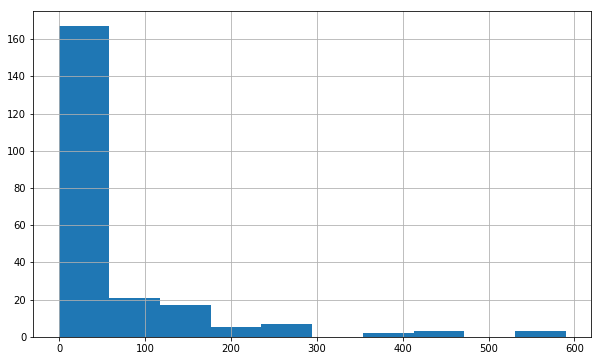

In [0]:
df['last_login_am_la'] = df.last_login.dt.tz_localize('America/Los_Angeles')
(df.last_login_am_la - df.loc[df.chargeback==1,'user_creation_date_am_la']).dt.days.hist(figsize=(10,6))

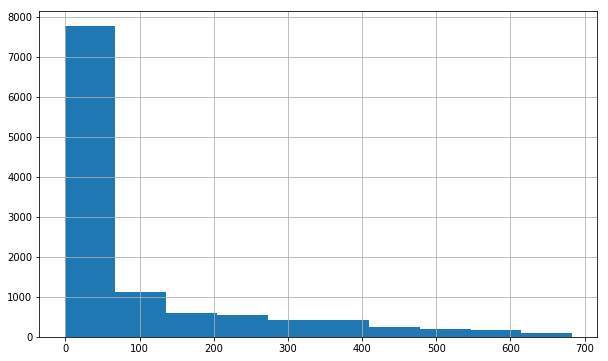

In [0]:
(df.last_login_am_la - df.loc[df.chargeback==0,'user_creation_date_am_la']).dt.days.hist(figsize=(10,6))

In [0]:
days = (df.transaction_date_am_la_fix - df.user_creation_date_am_la).dt.days 

sum(days<60)/len(days)

0.47582978723404257

In [0]:
df[['transaction_date_am_la_fix', 'user_creation_date_am_la']].head(10)

,transaction_date_am_la_fix,user_creation_date_am_la
0,2019-05-03 17:00:00-07:00,2019-05-03 19:49:00-07:00
1,2019-05-04 17:00:00-07:00,2019-05-05 09:09:00-07:00
2,2019-05-04 17:00:00-07:00,2019-01-07 19:57:00-08:00
3,2019-05-05 17:00:00-07:00,2019-05-06 12:00:00-07:00
4,2019-05-09 17:00:00-07:00,2018-03-09 09:55:00-08:00
5,2019-05-09 17:00:00-07:00,2019-05-07 19:43:00-07:00
6,2019-05-04 17:00:00-07:00,2019-03-05 17:45:00-08:00
7,2019-05-06 17:00:00-07:00,2019-03-27 08:11:00-07:00
8,2019-05-07 17:00:00-07:00,2019-05-08 15:34:00-07:00
9,2019-05-08 17:00:00-07:00,2019-05-09 05:24:00-07:00


**Lets drop some unnecessary fields which are not required for our model**

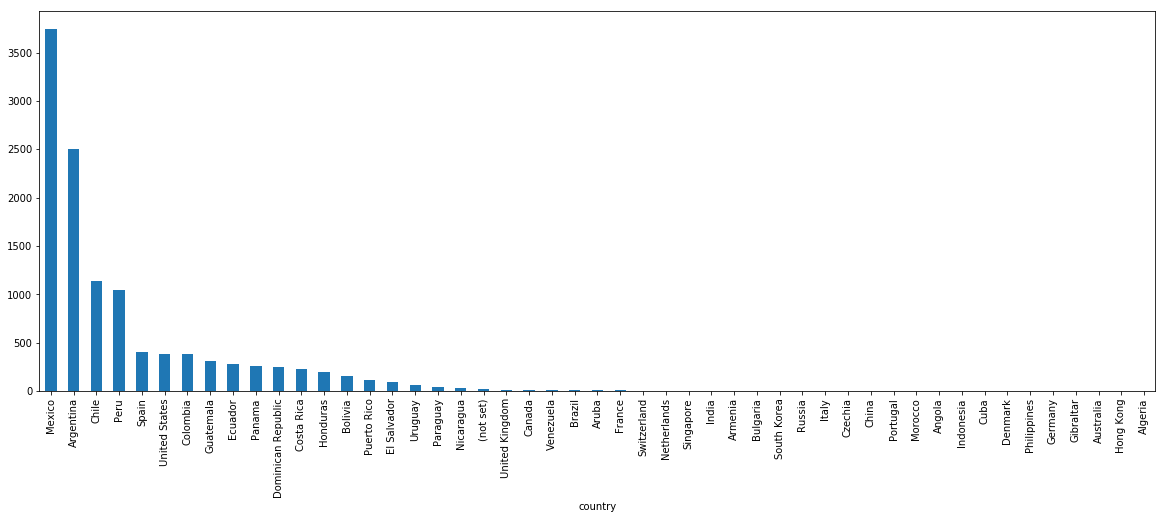

In [0]:
df.groupby(['country'])['chargeback'].agg(np.size).sort_values(ascending=False).plot(kind='bar',figsize=(20,7),y='Total Transactions')

In [0]:
df.head()

,created_am_la,payment_method_name,transaction_currency,transaction_date_am_la,user_id,plan_period,plan_period_first_activated_plan,transaction_amount_100_usd,payment_method_name_use,error_message,crosswalkplanperiod_touse,plan_country_from_subscription,user_external_plan_first_activated_plan,browser,operatingSystem,isMobile,mobileDeviceBranding,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix
0,2019-05-03 19:51:00,debitcard,MXN,2019-05-03 17:00:00,341412195,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Motorola,mobile,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00
1,2019-05-05 09:10:00,creditcard,ARS,2019-05-04 17:00:00,341479440,30,30,6.73,creditcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Android,True,Samsung,mobile,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00
2,2019-05-05 12:06:00,debitcard,MXN,2019-05-04 17:00:00,334039570,30,30,26.38,debitcard,APPROVED,NaN,NaN,monthly_20171212,Chrome,Windows,False,0,desktop,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00
3,2019-05-06 16:40:00,creditcard,ARS,2019-05-05 17:00:00,341572424,30,30,0.65,creditcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00
4,2019-05-10 03:37:00,debitcard,EUR,2019-05-09 17:00:00,315339375,30,30,2.25,debitcard,APPROVED,NaN,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00


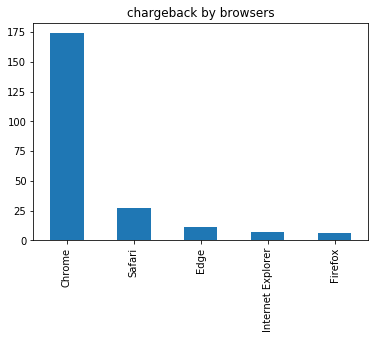

In [0]:
df.loc[df.chargeback==1,'browser'].value_counts().plot(kind='bar',title='chargeback by browsers')

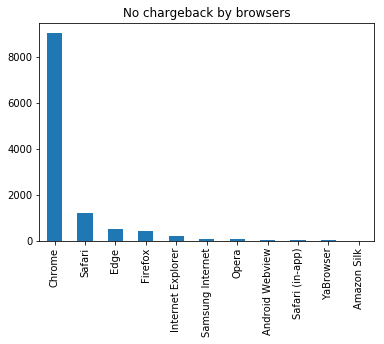

In [0]:
df.loc[df.chargeback==0,'browser'].value_counts().plot(kind='bar',title='No chargeback by browsers')

In [0]:
df['operatingSystem'].value_counts()

Windows       8246
Android       1576
Macintosh     1103
iOS            776
Linux           26
Chrome OS       22
BlackBerry       1
Name: operatingSystem, dtype: int64

In [0]:
df['isMobile'].value_counts()

False    9365
True     2385
Name: isMobile, dtype: int64

In [0]:
df['mobileDeviceBranding'].value_counts().head()

0           9365
Apple        776
Samsung      747
Huawei       262
Motorola     192
Name: mobileDeviceBranding, dtype: int64

In [0]:
df['deviceCategory'].value_counts()

desktop    9365
mobile     2212
tablet      173
Name: deviceCategory, dtype: int64

difference between last login and created
first 30 days total views, 2nd month,  3 month, > 3 month download, total hits on the day of subscription also.
if cancel immediately (no of days from subscription till cancel date or chargeback).


# Lets analyze chargeback and respective categories

In [0]:
df.groupby('payment_method_name').sum()[['chargeback']]

,chargeback
payment_method_name,
creditcard,180
debitcard,45


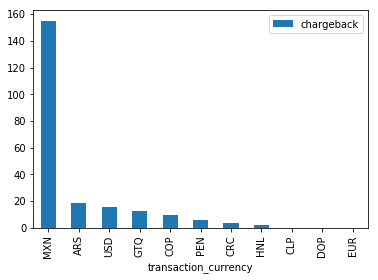

In [0]:
df.groupby('transaction_currency').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

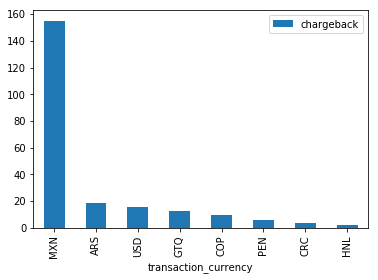

In [0]:
df.loc[df.chargeback==1].groupby('transaction_currency').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

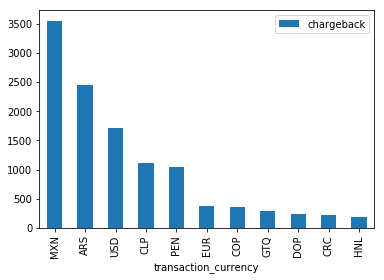

In [0]:
df.loc[df.chargeback==0].groupby('transaction_currency').count()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

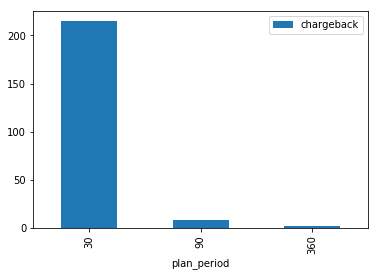

In [0]:
df.loc[df.chargeback==1].groupby('plan_period').sum()[['chargeback']].plot(kind='bar')

In [0]:
df.groupby('plan_period_first_activated_plan').sum()[['chargeback']]

,chargeback
plan_period_first_activated_plan,
30,215
90,8
360,2


In [0]:
df.groupby('payment_method_name_use').sum()[['chargeback']]

,chargeback
payment_method_name_use,
creditcard,180
debitcard,45


In [0]:
# below two fileds are duplicate, so lets drop them
df.drop(['plan_period_first_activated_plan','payment_method_name_use'],axis=1,inplace=True)

In [0]:
df.groupby('error_message').sum()[['chargeback']]

,chargeback
error_message,
APPROVED,80
FAILED,0
NOT CHECKED BY ACQUIRER,0
UNKNOWN,145


In [0]:
df.groupby('crosswalkplanperiod_touse').sum()[['chargeback']]

,chargeback
crosswalkplanperiod_touse,
30.0,24
90.0,6
360.0,2


In [0]:
# this field also seems reduntant so lets drop this as well.
df.drop(['crosswalkplanperiod_touse'],axis=1,inplace=True)

In [0]:
df.shape

(11750, 28)

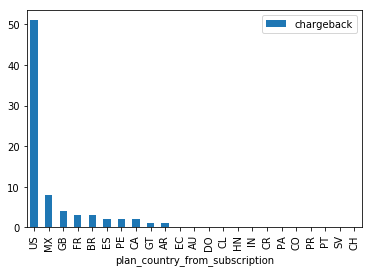

In [0]:
df.groupby('plan_country_from_subscription').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

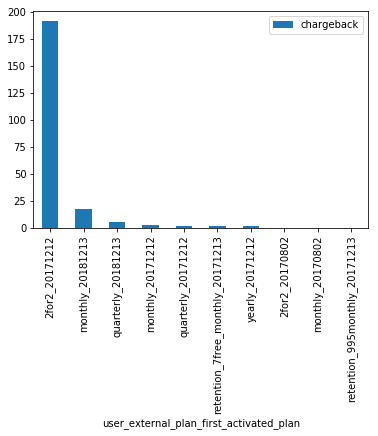

In [0]:
df.groupby('user_external_plan_first_activated_plan').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

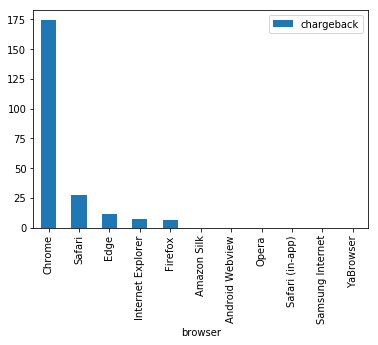

In [0]:
df.groupby('browser').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

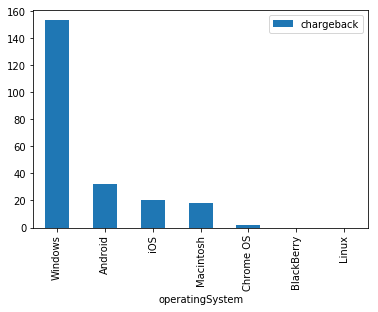

In [0]:
df.groupby('operatingSystem').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

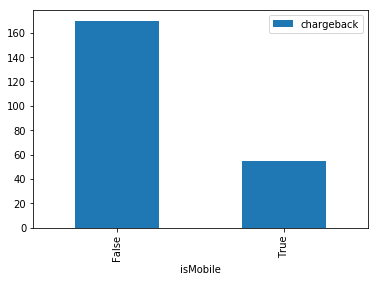

In [0]:
df.groupby('isMobile').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

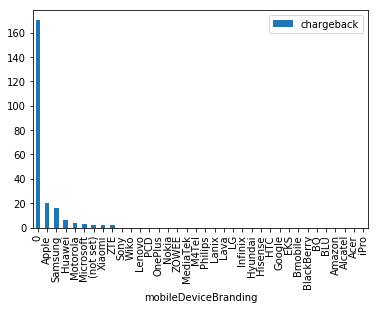

In [0]:
df.groupby('mobileDeviceBranding').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

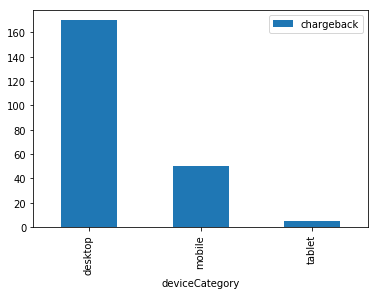

In [0]:
df.groupby('deviceCategory').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

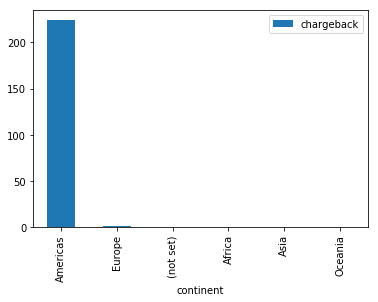

In [0]:
df.groupby('continent').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

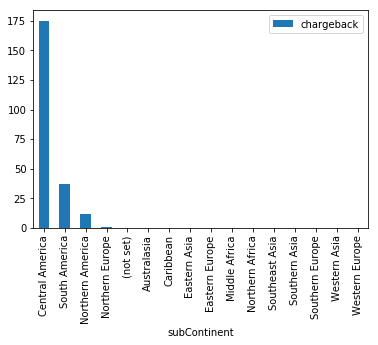

In [0]:
df.groupby('subContinent').sum()[['chargeback']].sort_values('chargeback',ascending=False).plot(kind='bar')

In [0]:
df.groupby('country').sum()[['chargeback']].sort_values('chargeback',ascending=False)

,chargeback
country,
Mexico,155
Argentina,19
Guatemala,13
United States,12
Colombia,12
Peru,6
Costa Rica,4
Honduras,2
El Salvador,1


#Majority of chargebacks are coming from Mexico

In [0]:
df.groupby('city').sum()[['chargeback']].sort_values('chargeback',ascending=False)

,chargeback
city,
Mexico City,37
(not set),31
Guatemala City,11
Monterrey,9
Bogota,8
Buenos Aires,8
Tijuana,7
Merida,7
Chihuahua,6


In [0]:
df.shape

(11750, 28)

In [0]:
#testing delete later
df.groupby('continent').chargeback.sum().sort_values(ascending=False)

continent
Americas     224
Europe         1
Oceania        0
Asia           0
Africa         0
(not set)      0
Name: chargeback, dtype: int64

#Lets create dummy variables for categorical fields

In [0]:
df_with_dummies = pd.get_dummies(df, prefix='payment_method_', columns=['payment_method_name'])

In [0]:
df_with_dummies.head()

,created_am_la,transaction_currency,transaction_date_am_la,user_id,plan_period,transaction_amount_100_usd,error_message,plan_country_from_subscription,user_external_plan_first_activated_plan,browser,operatingSystem,isMobile,mobileDeviceBranding,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard
0,2019-05-03 19:51:00,MXN,2019-05-03 17:00:00,341412195,30,26.38,APPROVED,NaN,monthly_20171212,Chrome,Android,True,Motorola,mobile,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1
1,2019-05-05 09:10:00,ARS,2019-05-04 17:00:00,341479440,30,6.73,APPROVED,NaN,monthly_20171212,Chrome,Android,True,Samsung,mobile,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0
2,2019-05-05 12:06:00,MXN,2019-05-04 17:00:00,334039570,30,26.38,APPROVED,NaN,monthly_20171212,Chrome,Windows,False,0,desktop,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1
3,2019-05-06 16:40:00,ARS,2019-05-05 17:00:00,341572424,30,0.65,APPROVED,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0
4,2019-05-10 03:37:00,EUR,2019-05-09 17:00:00,315339375,30,2.25,APPROVED,NaN,2for2_20171212,Chrome,Windows,False,0,desktop,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1


In [0]:
df_with_dummies.shape

(11750, 33)

In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='transaction_currency_', columns=['transaction_currency'])

In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='plan_period_', columns=['plan_period'])

In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='error_message_', columns=['error_message'])


In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='plan_country_', columns=['plan_country_from_subscription'])

In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='browser_', columns=['browser'])

In [0]:
df_with_dummies.shape

(11750, 76)

In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='operatingSystem_', columns=['operatingSystem'])
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,user_external_plan_first_activated_plan,isMobile,mobileDeviceBranding,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,...,plan_country__AU,plan_country__BR,plan_country__CA,plan_country__CH,plan_country__CL,plan_country__CO,plan_country__CR,plan_country__DO,plan_country__EC,plan_country__ES,plan_country__FR,plan_country__GB,plan_country__GT,plan_country__HN,plan_country__IN,plan_country__MX,plan_country__PA,plan_country__PE,plan_country__PR,plan_country__PT,plan_country__SV,plan_country__US,browser__Amazon Silk,browser__Android Webview,browser__Chrome,browser__Edge,browser__Firefox,browser__Internet Explorer,browser__Opera,browser__Safari,browser__Safari (in-app),browser__Samsung Internet,browser__YaBrowser,operatingSystem__Android,operatingSystem__BlackBerry,operatingSystem__Chrome OS,operatingSystem__Linux,operatingSystem__Macintosh,operatingSystem__Windows,operatingSystem__iOS
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,monthly_20171212,True,Motorola,mobile,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,monthly_20171212,True,Samsung,mobile,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,monthly_20171212,False,0,desktop,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,2for2_20171212,False,0,desktop,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,2for2_20171212,False,0,desktop,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
df_with_dummies.isMobile = df_with_dummies.isMobile.astype(int)
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,user_external_plan_first_activated_plan,isMobile,mobileDeviceBranding,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,...,plan_country__AU,plan_country__BR,plan_country__CA,plan_country__CH,plan_country__CL,plan_country__CO,plan_country__CR,plan_country__DO,plan_country__EC,plan_country__ES,plan_country__FR,plan_country__GB,plan_country__GT,plan_country__HN,plan_country__IN,plan_country__MX,plan_country__PA,plan_country__PE,plan_country__PR,plan_country__PT,plan_country__SV,plan_country__US,browser__Amazon Silk,browser__Android Webview,browser__Chrome,browser__Edge,browser__Firefox,browser__Internet Explorer,browser__Opera,browser__Safari,browser__Safari (in-app),browser__Samsung Internet,browser__YaBrowser,operatingSystem__Android,operatingSystem__BlackBerry,operatingSystem__Chrome OS,operatingSystem__Linux,operatingSystem__Macintosh,operatingSystem__Windows,operatingSystem__iOS
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,monthly_20171212,1,Motorola,mobile,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,monthly_20171212,1,Samsung,mobile,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,monthly_20171212,0,0,desktop,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,2for2_20171212,0,0,desktop,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,2for2_20171212,0,0,desktop,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='mobileDeviceBranding_', columns=['mobileDeviceBranding'])
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,user_external_plan_first_activated_plan,isMobile,deviceCategory,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,...,operatingSystem__Linux,operatingSystem__Macintosh,operatingSystem__Windows,operatingSystem__iOS,mobileDeviceBranding__(not set),mobileDeviceBranding__0,mobileDeviceBranding__Acer,mobileDeviceBranding__Alcatel,mobileDeviceBranding__Amazon,mobileDeviceBranding__Apple,mobileDeviceBranding__BLU,mobileDeviceBranding__BQ,mobileDeviceBranding__BlackBerry,mobileDeviceBranding__Bmobile,mobileDeviceBranding__EKS,mobileDeviceBranding__Google,mobileDeviceBranding__HTC,mobileDeviceBranding__Hisense,mobileDeviceBranding__Huawei,mobileDeviceBranding__Hyundai,mobileDeviceBranding__Infinix,mobileDeviceBranding__LG,mobileDeviceBranding__Lanix,mobileDeviceBranding__Lava,mobileDeviceBranding__Lenovo,mobileDeviceBranding__M4Tel,mobileDeviceBranding__MediaTek,mobileDeviceBranding__Microsoft,mobileDeviceBranding__Motorola,mobileDeviceBranding__Nokia,mobileDeviceBranding__OnePlus,mobileDeviceBranding__PCD,mobileDeviceBranding__Philips,mobileDeviceBranding__Samsung,mobileDeviceBranding__Sony,mobileDeviceBranding__Wiko,mobileDeviceBranding__Xiaomi,mobileDeviceBranding__ZOWEE,mobileDeviceBranding__ZTE,mobileDeviceBranding__iPro
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,monthly_20171212,1,mobile,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,monthly_20171212,1,mobile,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,monthly_20171212,0,desktop,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,2for2_20171212,0,desktop,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,2for2_20171212,0,desktop,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='deviceCategory_', columns=['deviceCategory'])
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,user_external_plan_first_activated_plan,isMobile,continent,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,plan_country__AR,...,operatingSystem__iOS,mobileDeviceBranding__(not set),mobileDeviceBranding__0,mobileDeviceBranding__Acer,mobileDeviceBranding__Alcatel,mobileDeviceBranding__Amazon,mobileDeviceBranding__Apple,mobileDeviceBranding__BLU,mobileDeviceBranding__BQ,mobileDeviceBranding__BlackBerry,mobileDeviceBranding__Bmobile,mobileDeviceBranding__EKS,mobileDeviceBranding__Google,mobileDeviceBranding__HTC,mobileDeviceBranding__Hisense,mobileDeviceBranding__Huawei,mobileDeviceBranding__Hyundai,mobileDeviceBranding__Infinix,mobileDeviceBranding__LG,mobileDeviceBranding__Lanix,mobileDeviceBranding__Lava,mobileDeviceBranding__Lenovo,mobileDeviceBranding__M4Tel,mobileDeviceBranding__MediaTek,mobileDeviceBranding__Microsoft,mobileDeviceBranding__Motorola,mobileDeviceBranding__Nokia,mobileDeviceBranding__OnePlus,mobileDeviceBranding__PCD,mobileDeviceBranding__Philips,mobileDeviceBranding__Samsung,mobileDeviceBranding__Sony,mobileDeviceBranding__Wiko,mobileDeviceBranding__Xiaomi,mobileDeviceBranding__ZOWEE,mobileDeviceBranding__ZTE,mobileDeviceBranding__iPro,deviceCategory__desktop,deviceCategory__mobile,deviceCategory__tablet
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,monthly_20171212,1,Americas,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,monthly_20171212,1,Americas,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,monthly_20171212,0,Americas,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,2for2_20171212,0,Americas,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,2for2_20171212,0,Europe,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='continent_', columns=['continent'])
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,user_external_plan_first_activated_plan,isMobile,subContinent,country,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,plan_country__AR,plan_country__AU,...,mobileDeviceBranding__Apple,mobileDeviceBranding__BLU,mobileDeviceBranding__BQ,mobileDeviceBranding__BlackBerry,mobileDeviceBranding__Bmobile,mobileDeviceBranding__EKS,mobileDeviceBranding__Google,mobileDeviceBranding__HTC,mobileDeviceBranding__Hisense,mobileDeviceBranding__Huawei,mobileDeviceBranding__Hyundai,mobileDeviceBranding__Infinix,mobileDeviceBranding__LG,mobileDeviceBranding__Lanix,mobileDeviceBranding__Lava,mobileDeviceBranding__Lenovo,mobileDeviceBranding__M4Tel,mobileDeviceBranding__MediaTek,mobileDeviceBranding__Microsoft,mobileDeviceBranding__Motorola,mobileDeviceBranding__Nokia,mobileDeviceBranding__OnePlus,mobileDeviceBranding__PCD,mobileDeviceBranding__Philips,mobileDeviceBranding__Samsung,mobileDeviceBranding__Sony,mobileDeviceBranding__Wiko,mobileDeviceBranding__Xiaomi,mobileDeviceBranding__ZOWEE,mobileDeviceBranding__ZTE,mobileDeviceBranding__iPro,deviceCategory__desktop,deviceCategory__mobile,deviceCategory__tablet,continent__(not set),continent__Africa,continent__Americas,continent__Asia,continent__Europe,continent__Oceania
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,monthly_20171212,1,Central America,Mexico,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,monthly_20171212,1,South America,Argentina,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,monthly_20171212,0,Central America,Mexico,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,2for2_20171212,0,South America,Argentina,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,2for2_20171212,0,Southern Europe,Spain,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [0]:
# Lets drop the column subcontinent
df_with_dummies.drop(['subContinent'],axis=1,inplace=True)

In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='country_', columns=['country'])
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,user_external_plan_first_activated_plan,isMobile,city,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,plan_country__AR,plan_country__AU,plan_country__BR,plan_country__CA,...,country__Bulgaria,country__Canada,country__Chile,country__China,country__Colombia,country__Costa Rica,country__Cuba,country__Czechia,country__Denmark,country__Dominican Republic,country__Ecuador,country__El Salvador,country__France,country__Germany,country__Gibraltar,country__Guatemala,country__Honduras,country__Hong Kong,country__India,country__Indonesia,country__Italy,country__Mexico,country__Morocco,country__Netherlands,country__Nicaragua,country__Panama,country__Paraguay,country__Peru,country__Philippines,country__Portugal,country__Puerto Rico,country__Russia,country__Singapore,country__South Korea,country__Spain,country__Switzerland,country__United Kingdom,country__United States,country__Uruguay,country__Venezuela
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,monthly_20171212,1,Aguascalientes,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,monthly_20171212,1,(not set),2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,monthly_20171212,0,Tepexpan,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,2for2_20171212,0,(not set),2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,2for2_20171212,0,Pamplona,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='city_', columns=['city'])
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,user_external_plan_first_activated_plan,isMobile,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,plan_country__AR,plan_country__AU,plan_country__BR,plan_country__CA,plan_country__CH,...,city__Venado Tuerto,city__Veracruz,city__Vicente Lopez,city__Victoria,city__Vilassar de Dalt,city__Villa Alemana,city__Villa Ballester,city__Villa Carlos Paz,city__Villa Dominico,city__Villa Lynch,city__Villa Maria,city__Villa Mercedes,city__Villa Rica,city__Villa de Alvarez,city__Villahermosa,city__Villanova,city__Villavicencio,city__Villaviciosa de Odon,city__Virrey del Pino,city__Washington,city__West Babylon,city__West New York,city__West Valley City,city__West Warwick,city__Weston,city__Wilde,city__Wilmington,city__Worthington,city__Xalapa,city__Xicotepec de Juarez,city__Xonacatlan,city__Yerevan,city__Yopal,city__Yuzhno-Sakhalinsk,city__Zacatecas,city__Zamora,city__Zapopan,city__Zaragoza,city__Zarate,city__Zumpango
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,monthly_20171212,1,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,monthly_20171212,1,2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,monthly_20171212,0,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,2for2_20171212,0,2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,2for2_20171212,0,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_with_dummies.shape

(11750, 932)

In [0]:
df_with_dummies = pd.get_dummies(df_with_dummies, prefix='first_activated_plan_', columns=['user_external_plan_first_activated_plan'])
df_with_dummies.head()

,created_am_la,transaction_date_am_la,user_id,transaction_amount_100_usd,isMobile,last_login,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,user_creation_date_am_la,transaction_date_am_la_fix,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,plan_country__AR,plan_country__AU,plan_country__BR,plan_country__CA,plan_country__CH,plan_country__CL,...,city__Villa Maria,city__Villa Mercedes,city__Villa Rica,city__Villa de Alvarez,city__Villahermosa,city__Villanova,city__Villavicencio,city__Villaviciosa de Odon,city__Virrey del Pino,city__Washington,city__West Babylon,city__West New York,city__West Valley City,city__West Warwick,city__Weston,city__Wilde,city__Wilmington,city__Worthington,city__Xalapa,city__Xicotepec de Juarez,city__Xonacatlan,city__Yerevan,city__Yopal,city__Yuzhno-Sakhalinsk,city__Zacatecas,city__Zamora,city__Zapopan,city__Zaragoza,city__Zarate,city__Zumpango,first_activated_plan__2for2_20170802,first_activated_plan__2for2_20171212,first_activated_plan__monthly_20170802,first_activated_plan__monthly_20171212,first_activated_plan__monthly_20181213,first_activated_plan__quarterly_20171212,first_activated_plan__quarterly_20181213,first_activated_plan__retention_7free_monthly_20171213,first_activated_plan__retention_995monthly_20171213,first_activated_plan__yearly_20171212
0,2019-05-03 19:51:00,2019-05-03 17:00:00,341412195,26.38,1,2019-05-04,7,23,0,0,0,0,2019-05-03 19:49:00-07:00,2019-05-03 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-05-05 09:10:00,2019-05-04 17:00:00,341479440,6.73,1,2019-05-05,20,26,0,0,0,0,2019-05-05 09:09:00-07:00,2019-05-04 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2019-05-05 12:06:00,2019-05-04 17:00:00,334039570,26.38,0,2019-05-05,13,13,1,0,85,0,2019-01-07 19:57:00-08:00,2019-05-04 17:00:00-07:00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2019-05-06 16:40:00,2019-05-05 17:00:00,341572424,0.65,0,2019-05-19,4,10,0,0,0,0,2019-05-06 12:00:00-07:00,2019-05-05 17:00:00-07:00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2019-05-10 03:37:00,2019-05-09 17:00:00,315339375,2.25,0,2019-05-10,10,13,0,0,14,0,2018-03-09 09:55:00-08:00,2019-05-09 17:00:00-07:00,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Lets drop all the unnecessary fields like date and other

In [0]:
df_with_dummies.drop(['created_am_la','transaction_date_am_la','user_id','last_login','user_creation_date_am_la','transaction_date_am_la_fix'],axis=1,inplace=True)

In [0]:
df_with_dummies.shape

(11750, 935)

In [0]:
df_with_dummies.head()

,transaction_amount_100_usd,isMobile,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,plan_country__AR,plan_country__AU,plan_country__BR,plan_country__CA,plan_country__CH,plan_country__CL,plan_country__CO,plan_country__CR,plan_country__DO,plan_country__EC,plan_country__ES,plan_country__FR,...,city__Villa Maria,city__Villa Mercedes,city__Villa Rica,city__Villa de Alvarez,city__Villahermosa,city__Villanova,city__Villavicencio,city__Villaviciosa de Odon,city__Virrey del Pino,city__Washington,city__West Babylon,city__West New York,city__West Valley City,city__West Warwick,city__Weston,city__Wilde,city__Wilmington,city__Worthington,city__Xalapa,city__Xicotepec de Juarez,city__Xonacatlan,city__Yerevan,city__Yopal,city__Yuzhno-Sakhalinsk,city__Zacatecas,city__Zamora,city__Zapopan,city__Zaragoza,city__Zarate,city__Zumpango,first_activated_plan__2for2_20170802,first_activated_plan__2for2_20171212,first_activated_plan__monthly_20170802,first_activated_plan__monthly_20171212,first_activated_plan__monthly_20181213,first_activated_plan__quarterly_20171212,first_activated_plan__quarterly_20181213,first_activated_plan__retention_7free_monthly_20171213,first_activated_plan__retention_995monthly_20171213,first_activated_plan__yearly_20171212
0,26.38,1,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6.73,1,20,26,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,26.38,0,13,13,1,0,85,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.65,0,4,10,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2.25,0,10,13,0,0,14,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


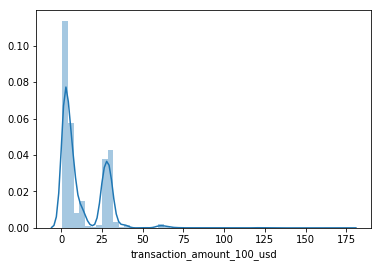

In [0]:
sns.distplot(df_with_dummies['transaction_amount_100_usd'])

In [0]:
df_with_dummies.head()

,transaction_amount_100_usd,isMobile,joined_day_pageviews,pageviews_in_first_month,pageviews_in_second_month,pageviews_in_third_month,pageviews_after_third_month,chargeback,payment_method__creditcard,payment_method__debitcard,transaction_currency__ARS,transaction_currency__CLP,transaction_currency__COP,transaction_currency__CRC,transaction_currency__DOP,transaction_currency__EUR,transaction_currency__GTQ,transaction_currency__HNL,transaction_currency__MXN,transaction_currency__PEN,transaction_currency__USD,plan_period__30,plan_period__90,plan_period__360,error_message__APPROVED,error_message__FAILED,error_message__NOT CHECKED BY ACQUIRER,error_message__UNKNOWN,plan_country__AR,plan_country__AU,plan_country__BR,plan_country__CA,plan_country__CH,plan_country__CL,plan_country__CO,plan_country__CR,plan_country__DO,plan_country__EC,plan_country__ES,plan_country__FR,...,city__Villa Maria,city__Villa Mercedes,city__Villa Rica,city__Villa de Alvarez,city__Villahermosa,city__Villanova,city__Villavicencio,city__Villaviciosa de Odon,city__Virrey del Pino,city__Washington,city__West Babylon,city__West New York,city__West Valley City,city__West Warwick,city__Weston,city__Wilde,city__Wilmington,city__Worthington,city__Xalapa,city__Xicotepec de Juarez,city__Xonacatlan,city__Yerevan,city__Yopal,city__Yuzhno-Sakhalinsk,city__Zacatecas,city__Zamora,city__Zapopan,city__Zaragoza,city__Zarate,city__Zumpango,first_activated_plan__2for2_20170802,first_activated_plan__2for2_20171212,first_activated_plan__monthly_20170802,first_activated_plan__monthly_20171212,first_activated_plan__monthly_20181213,first_activated_plan__quarterly_20171212,first_activated_plan__quarterly_20181213,first_activated_plan__retention_7free_monthly_20171213,first_activated_plan__retention_995monthly_20171213,first_activated_plan__yearly_20171212
0,26.38,1,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6.73,1,20,26,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,26.38,0,13,13,1,0,85,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.65,0,4,10,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2.25,0,10,13,0,0,14,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#Lets build the model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score
 

In [0]:
x = df_with_dummies.drop('chargeback',axis=1)
y= df_with_dummies['chargeback']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [0]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(x_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2303
           1       0.00      0.00      0.00        47

    accuracy                           0.98      2350
   macro avg       0.49      0.50      0.49      2350
weighted avg       0.96      0.98      0.97      2350



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print("Accuracy is: ",accuracy_score(y_test,predictions))
print("f1 score for logistic model is: ",f1_score(y_test, predictions))
print("recall score for logistic model is: ",f1_score(y_test, predictions))

Accuracy is:  0.98
f1 score for logistic model is:  0.0
recall score for logistic model is:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
df_with_dummies.chargeback.value_counts()[0]/len(df_with_dummies)

0.9808510638297873

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
y_pred = rfc.predict(x_test)

print("Accuracy is: ",accuracy_score(y_test, y_pred))


#print(classification_report(y_test,y_pred))

print("f1 score is: ",f1_score(y_test,y_pred))
print("recall score is: ",recall_score(y_test,y_pred))



Accuracy is:  0.9817021276595744
f1 score is:  0.1568627450980392
recall score is:  0.0851063829787234


**Lets do Oversampling(upsample) and see if it works:**

In [0]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
not_chargeback = X[X.chargeback==0]
chargeback = X[X.chargeback==1]

# upsample minority
chargeback_upsampled = resample(chargeback,
                          replace=True, # sample with replacement
                          n_samples=len(not_chargeback), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_chargeback, chargeback_upsampled])

# check new class counts
upsampled.chargeback.value_counts()

1    9222
0    9222
Name: chargeback, dtype: int64

**After resampling we have an equal ratio of data points for each class! Let’s try our logistic regression again with the balanced training data.**

In [0]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.chargeback
x_train = upsampled.drop('chargeback', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(x_train, y_train)

upsampled_pred = upsampled.predict(x_test)

print(classification_report(y_test,upsampled_pred))


              precision    recall  f1-score   support

           0       1.00      0.81      0.89      2303
           1       0.08      0.85      0.15        47

    accuracy                           0.81      2350
   macro avg       0.54      0.83      0.52      2350
weighted avg       0.98      0.81      0.88      2350



In [0]:
print("Accuracy is: ",accuracy_score(y_test, upsampled_pred))
print("f1 score is: ",f1_score(y_test,upsampled_pred))
print("recall score is: ",recall_score(y_test,upsampled_pred))


Accuracy is:  0.8097872340425532
f1 score is:  0.15180265654648953
recall score is:  0.851063829787234


**Lets do Undersampling(downsample) and see if it works:**

In [0]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_chargeback_downsampled = resample(not_chargeback,
                                replace = False, # sample without replacement
                                n_samples = len(chargeback), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_chargeback_downsampled, chargeback])

# checking counts
downsampled.chargeback.value_counts()


1    178
0    178
Name: chargeback, dtype: int64

In [0]:

# trying logistic regression again with the undersampled dataset

y_train = downsampled.chargeback
x_train = downsampled.drop('chargeback', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(x_train, y_train)

undersampled_pred = undersampled.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, undersampled_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, undersampled_pred))


print("recall score is: ",recall_score(y_test, undersampled_pred))


accuracy is:  0.6502127659574468
f1 score is:  0.09271523178807947
recall score is:  0.8936170212765957


Undersampling underperformed oversampling in this case. Let’s try one more method for handling imbalanced data.

**Lets try SMOTE or Synthetic Minority Oversampling Technique:**

In [0]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
x = df_with_dummies.drop('chargeback',axis=1)
y= df_with_dummies['chargeback']

# setting up testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

sm = SMOTE(random_state=1, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, smote_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, smote_pred))


print("recall score is: ",recall_score(y_test, smote_pred))

accuracy is:  0.831063829787234
f1 score is:  0.15711252653927812
recall score is:  0.7872340425531915


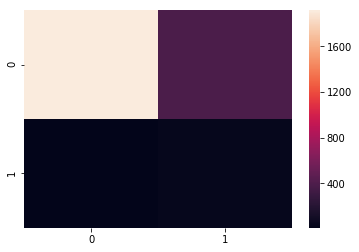

In [0]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,smote_pred)))
plt.show()

**Decesion Tree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(x_train, y_train)

dt_pred = dt.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, dt_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, dt_pred))


print("recall score is: ",recall_score(y_test, dt_pred))

accuracy is:  0.9770212765957447
f1 score is:  0.2894736842105263
recall score is:  0.23404255319148937


Decesion tree has given best performance accuracy and f1 score are better than any other model above.

In [0]:
y_train.sum()/len(y_train)

0.5

In [0]:
(len(y_train)-y_train.sum())/len(y_train)

0.5

In [0]:
pd.DataFrame(y_train).sum()/len(pd.DataFrame(y_train))

0    0.5
dtype: float64

In [0]:
confusion_matrix(y_test, dt_pred)

array([[2285,   18],
       [  36,   11]])

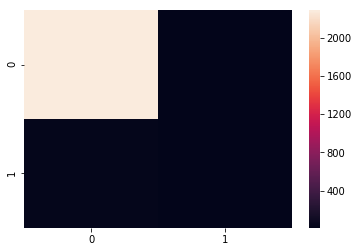

In [0]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,dt_pred)))
plt.show()

In [0]:
pd.DataFrame(confusion_matrix(y_test,dt_pred))

,0,1
0,2285,18
1,36,11


In [0]:
ld =list(y_test)
ld.count(1)
#ld.count(0)

47

# Lets apply PCA

In [0]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
x = df_with_dummies.drop('chargeback',axis=1)
y= df_with_dummies['chargeback']

# Lets do scaling first
from sklearn.preprocessing import MinMaxScaler
scaled_x = MinMaxScaler().fit(x).transform(x)

# Apply PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
pca.fit(scaled_x)
pca_x=pca.transform(scaled_x)

In [0]:
pca_x.shape

(11750, 12)

In [0]:
# setting up testing and training sets
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.2,random_state=1)

sm = SMOTE(random_state=1, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [0]:
x_train.shape

(18444, 12)

In [0]:
import numpy as np
l=list(y_test)
print(l.count(0))
print(l.count(1))


2303
47


In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(x_train, y_train)

dt_pred = dt.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, dt_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, dt_pred))


print("recall score is: ",recall_score(y_test, dt_pred))

accuracy is:  0.9493617021276596
f1 score is:  0.14388489208633093
recall score is:  0.2127659574468085


In [0]:
pd.DataFrame(confusion_matrix(y_test,dt_pred))

,0,1
0,2221,82
1,37,10


**PCA is not improving score it is worse than normal Decision Tree Classifier.**

In [0]:
confusion_matrix(y_test, dt_pred)

array([[2221,   82],
       [  37,   10]])

**Lets try Logistic Regression again:**

In [0]:
lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)

lr_pred = lr.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, lr_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, lr_pred))


print("recall score is: ",recall_score(y_test, lr_pred))

accuracy is:  0.7153191489361702
f1 score is:  0.08979591836734696
recall score is:  0.7021276595744681


In [0]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,1648,655
1,14,33


In [0]:
655/(655+1648)

0.28441163699522365

**Perform Grid Search**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

tuned_parameters = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]

# Find Optimal C by grid search 

log_reg_clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))

logistic_gs = GridSearchCV(log_reg_clf, tuned_parameters,scoring = 'f1_micro', cv=3)

best_model=logistic_gs.fit(x_train, y_train)
#print(logistic_gs.best_estimator_)


best_pred = best_model.predict(x_test)


# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, best_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, best_pred))


print("recall score is: ",recall_score(y_test, best_pred))

print(pd.DataFrame(confusion_matrix(y_test, best_pred)))

accuracy is:  0.6893617021276596
f1 score is:  0.08521303258145363
recall score is:  0.723404255319149
      0    1
0  1586  717
1    13   34


In [0]:
pd.DataFrame(confusion_matrix(y_test, best_pred))

,0,1
0,1586,717
1,13,34


In [0]:
#t_pred = (best_model.predict_proba(x_test)[:,1] >= 0.5).astype(bool)
#
## Checking accuracy
#print("accuracy is: ",accuracy_score(y_test, t_pred))
#
## f1 score
#print("f1 score is: ",f1_score(y_test, t_pred))
#
#
#print("recall score is: ",recall_score(y_test, t_pred))
#
#print(pd.DataFrame(confusion_matrix(y_test, t_pred)))



**One More Grid Search**

In [0]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')

logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.694643244415528


In [0]:
logreg2=LogisticRegression(C=0.001,penalty="l2",solver='liblinear')
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.6991489361702128


In [0]:
logreg2_pred = logreg2.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, logreg2_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, logreg2_pred))


print("recall score is: ",recall_score(y_test, logreg2_pred))

accuracy is:  0.6991489361702128
f1 score is:  0.08774193548387098
recall score is:  0.723404255319149


In [0]:
pd.DataFrame(confusion_matrix(y_test, logreg2_pred))

,0,1
0,1609,694
1,13,34


In [0]:
rf = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

rf_pred = rf.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, rf_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, rf_pred))


print("recall score is: ",recall_score(y_test, rf_pred))

accuracy is:  0.9595744680851064
f1 score is:  0.12844036697247704
recall score is:  0.14893617021276595


In [0]:
pd.DataFrame(confusion_matrix(y_test, rf_pred))

,0,1
0,2248,55
1,40,7


Random forest is worse than logistic regression.

**Gradient Boosting**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)


gbm_pred = gbm.predict(x_test)

# Checking accuracy
print("accuracy is: ",accuracy_score(y_test, gbm_pred))


# f1 score
print("f1 score is: ",f1_score(y_test, gbm_pred))


print("recall score is: ",recall_score(y_test, gbm_pred))

accuracy is:  0.7646808510638298
f1 score is:  0.09195402298850576
recall score is:  0.5957446808510638


In [0]:
pd.DataFrame(confusion_matrix(y_test, gbm_pred))

,0,1
0,1769,534
1,19,28


In [0]:
print(classification_report(y_test, gbm_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      2303
           1       0.05      0.60      0.09        47

    accuracy                           0.76      2350
   macro avg       0.52      0.68      0.48      2350
weighted avg       0.97      0.76      0.85      2350

